In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('stock.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
abbr          290 non-null object
cir_cap       290 non-null float64
cir_val       290 non-null float64
code          290 non-null object
main_scope    282 non-null object
net_profit    287 non-null object
tot_cap       290 non-null float64
tot_val       290 non-null float64
dtypes: float64(4), object(4)
memory usage: 18.2+ KB


In [6]:
data.head()

,abbr,cir_cap,cir_val,code,main_scope,net_profit,tot_cap,tot_val
0,国农科技,8260.46,240131.53,a000004,"生物医药88.66%,移动网络10.95%,其他业务0.39%",381.60,16505.26,479807.98
1,万方发展,30940.00,124997.60,a000638,"软件88.13%,金融其他11.87%",-626.93,30940.00,124997.60
2,顺利办,70720.16,306925.50,a000606,企业互联100.00%,--,76579.94,332356.92
3,神州信息,96342.05,1436459.93,a000555,"金融41.91%,政企32.09%,运营商18.69%,其他7.31%",2946.50,97038.13,1446838.48
4,国新健康,89877.99,937427.47,a000503,服务业100.00%,-7118.24,89882.22,937471.56


In [7]:
data['main_scope']= data['main_scope'].fillna('1111')

In [8]:
data['net_profit']= data['net_profit'].replace(' --',np.nan)

In [9]:
data['net_profit'].value_counts()

 27436.01     2
 441.44       2
 -264.14      1
 -3057.37     1
 -1344.46     1
             ..
 214638.30    1
 2738.29      1
 -2542.75     1
 -1155.33     1
 5297.19      1
Name: net_profit, Length: 274, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
abbr          290 non-null object
cir_cap       290 non-null float64
cir_val       290 non-null float64
code          290 non-null object
main_scope    290 non-null object
net_profit    276 non-null object
tot_cap       290 non-null float64
tot_val       290 non-null float64
dtypes: float64(4), object(4)
memory usage: 18.2+ KB


In [11]:
data['main_scope']= data['main_scope'].apply(lambda x:x[:4])

In [12]:
data['main_scope'].value_counts()

软件和信    20
信息技术     9
1111     8
智慧城市     7
有线电视     7
        ..
资管业务     1
收单业务     1
互联网服     1
文化娱乐     1
营销托管     1
Name: main_scope, Length: 182, dtype: int64


## 创建一个se  label

In [13]:
data['net_profit'].value_counts()

 27436.01     2
 441.44       2
 -264.14      1
 -3057.37     1
 -1344.46     1
             ..
 214638.30    1
 2738.29      1
 -2542.75     1
 -1155.33     1
 5297.19      1
Name: net_profit, Length: 274, dtype: int64

In [14]:
data['net_profit']= data['net_profit'].apply(lambda x:x.strip() if type(x)==str else x)

In [15]:
data['net_profit']= data['net_profit'].fillna(-1)

In [17]:
data['net_profit']= data['net_profit'].astype(float)

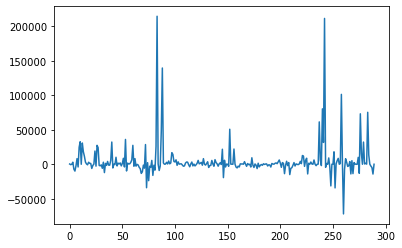

In [19]:
plt.plot(data['net_profit'])

In [ ]:
plt.plot(data['tot_val'])

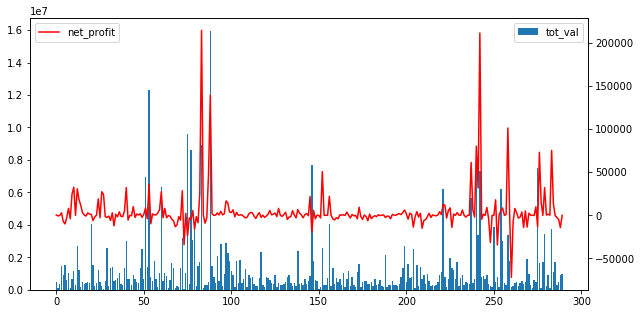

In [75]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

x=np.arange(290)
ax.bar(x,data['tot_val'],label='tot_val')
ax.legend(loc=0)
ax2=plt.twinx()
ax2.plot(x,data['net_profit'],color='red',label='net_profit')

ax2.legend(loc='upper left')

In [15]:
data['se']=data['tot_val']/data['net_profit']

In [16]:
data['se']=round(data['se'],2)

# se是市盈率

In [17]:
data['se']= data['se'].apply(lambda x:np.nan if x<0 else x)

In [18]:
data=data.dropna()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 287
Data columns (total 9 columns):
abbr          167 non-null object
cir_cap       167 non-null float64
cir_val       167 non-null float64
code          167 non-null object
main_scope    167 non-null object
net_profit    167 non-null float64
tot_cap       167 non-null float64
tot_val       167 non-null float64
se            167 non-null float64
dtypes: float64(6), object(3)
memory usage: 13.0+ KB


### 把净利润为负数的企业去掉后290-167，可见疫情对经济的冲击力

In [20]:
data['se']

0      1357.27
1       159.80
2       653.74
3       439.29
4        55.53
        ...   
281     640.81
282      90.15
283      73.29
284      18.34
287     523.31
Name: se, Length: 167, dtype: float64

In [21]:
data['se'].describe()

count      167.000000
mean      1068.434551
std       2886.551352
min          2.830000
25%        138.925000
50%        369.130000
75%        794.255000
max      24178.620000
Name: se, dtype: float64

In [22]:
data.sort_values('se')

,abbr,cir_cap,cir_val,code,main_scope,net_profit,tot_cap,tot_val,se
27,云赛Ｂ股,29337.05,14697.86,a900901,工业61,24179.08,136767.35,68520.44,2.83
278,*ST东网,75374.88,134167.28,a002175,计量器具,15311.49,75377.82,134172.52,8.76
26,宝信Ｂ,29744.00,66626.56,a900926,软件开发,27436.01,114037.03,255442.94,9.31
87,浙江富润,47909.70,431187.27,a600070,信息服务,48547.86,52194.61,469751.51,9.68
284,*ST天润,94080.71,129831.38,a002113,游戏运营,11533.97,153269.29,211511.62,18.34
...,...,...,...,...,...,...,...,...,...
153,腾信股份,25900.36,186482.59,a300392,互联网营,50.19,38400.00,276480.00,5508.67
166,长亮科技,35742.16,940018.85,a300348,软件开发,182.01,48181.03,1267161.01,6962.04
170,华虹计通,16771.97,149941.45,a300330,系统集成,11.98,16800.00,150192.00,12536.89
154,飞天诚信,21924.98,412408.97,a300386,信息安全,33.40,41804.40,786340.76,23543.14


# 设置当前股票价格price=总市值/总股本

In [23]:
data['price']=data['tot_val']/data['tot_cap']
data['price']=round(data['price'],2)

In [24]:
data.head()

,abbr,cir_cap,cir_val,code,main_scope,net_profit,tot_cap,tot_val,se,price
0,国农科技,8260.46,259213.18,a000004,生物医药,381.60,16505.26,517935.14,1357.27,31.38
1,生 意 宝,25163.81,489939.36,a002095,化工贸易,3079.21,25272.00,492045.84,159.80,19.47
2,国脉科技,100264.62,911405.35,a002093,企业38,1400.89,100750.00,915817.50,653.74,9.09
3,*ST凯瑞,17600.00,98032.00,a002072,互联网8,223.16,17600.00,98032.00,439.29,5.57
4,东华软件,280760.81,3770617.73,a002065,金融行业,75346.78,311548.24,4184092.83,55.53,13.43


In [25]:
data['price'].describe()

count    167.000000
mean      29.786826
std       52.123297
min        0.500000
25%        8.125000
50%       14.860000
75%       28.085000
max      437.770000
Name: price, dtype: float64

In [26]:
data.sort_values('price')

,abbr,cir_cap,cir_val,code,main_scope,net_profit,tot_cap,tot_val,se,price
27,云赛Ｂ股,29337.05,14697.86,a900901,工业61,24179.08,136767.35,68520.44,2.83,0.50
250,*ST晨鑫,135014.80,153916.88,a002447,游戏行业,68.91,142719.30,162700.00,2361.05,1.14
284,*ST天润,94080.71,129831.38,a002113,游戏运营,11533.97,153269.29,211511.62,18.34,1.38
278,*ST东网,75374.88,134167.28,a002175,计量器具,15311.49,75377.82,134172.52,8.76,1.78
50,吉视传媒,311109.04,628440.26,a601929,有线电视,1069.75,311109.04,628440.26,587.46,2.02
...,...,...,...,...,...,...,...,...,...,...
111,富瀚微,4189.56,787636.34,a300613,集成电路,3034.14,4444.48,835562.24,275.39,188.00
96,值得买,1333.33,258506.68,a300785,信息推广,1898.58,5333.33,1034026.68,544.63,193.88
229,中新赛克,5182.00,1035881.80,a002912,政府63,3211.59,10672.00,2133332.80,664.26,199.90
94,壹网壹创,2000.00,691200.00,a300792,1111,4732.71,8013.90,2769603.84,585.20,345.60


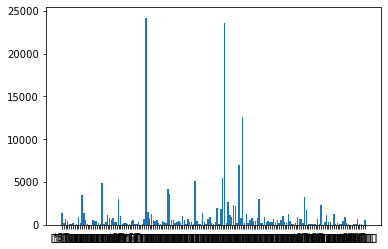

In [30]:
plt.bar(data['abbr'],data['se'])
plt.show()

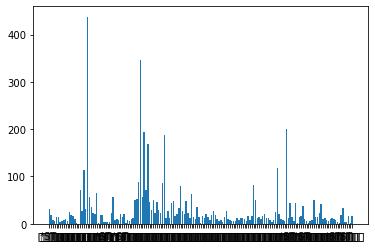

In [29]:
plt.bar(data['abbr'],data['price'])
pltt.title()
plt.show()

In [1]:
sns.jointplot(x=data['price'],y=data['se'])

NameError: name 'sns' is not defined

In [ ]:
plt.plot(data['abbr'],data['price'])
plt.plot(data['abbr'],data['se'])